# Temporary file for debuging the python output option

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI

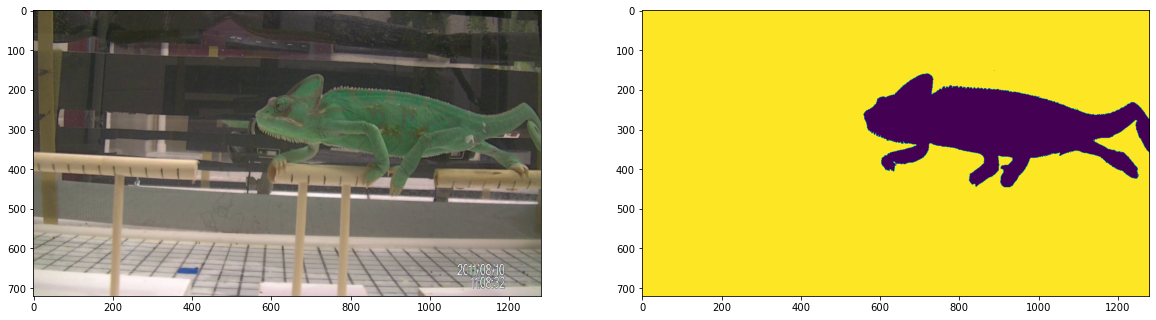

In [2]:
import imageio

# img = imageio.imread('Image_data/20220512-Tar_Spot_example/DC20_2290_TarSpot_5photo_1_2020-08-20-10-11-56.jpg_01_02.jpg')
# gmask = imageio.imread('Image_data/20220512-Tar_Spot_example/DC20_2290_TarSpot_5photo_1_2020-08-20-10-11-56.jpg_01_02_GT.png')

img = imageio.imread('Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('Image_data/Examples/AA_Chameleon_GT.png')


fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)

In [3]:
from see import base_classes

# put data in a pipeline
data = base_classes.pipedata()
data.img = img
data.gmask = gmask

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

In [5]:
params =  ['RGB CIE', False, 1, 'ColorThreshold', 0.7109375, 0.875, 0.19921875, 0.40234375, 0.1640625, 0.421875, 1, 6] 
#params =  ['YUV', True, 1, 'ColorThreshold', 0.2421875, 0.453125, 0.72265625, 0.921875, 0.26953125, 0.25390625, 9, 5]

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = False
	channel = 1
	algorithm = ColorThreshold
	alpha1 = 0.7109375
	alpha2 = 0.875
	beta1 = 0.19921875
	beta2 = 0.40234375
	gamma1 = 0.1640625
	gamma2 = 0.421875
	n_segments = 1
	max_iter = 6

Time: 0.585 s


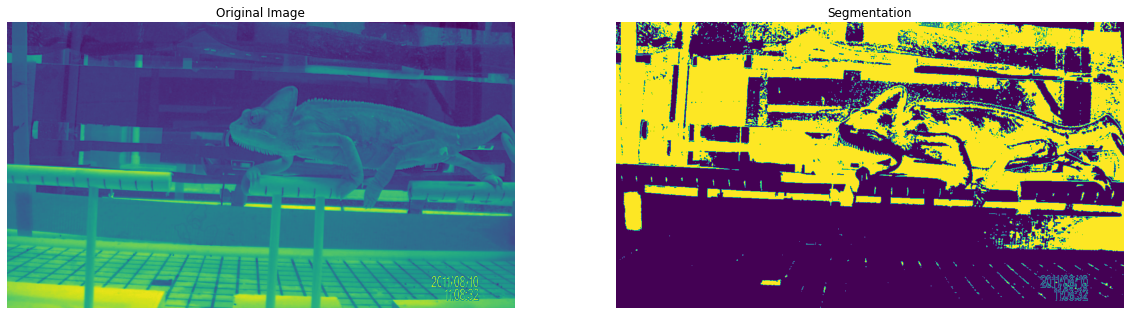

In [6]:
seg = workflow(params)
data = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [7]:
print('Fitness Value: ', data.fitness)

Fitness Value:  1


In [8]:
print(seg.algorithm_code())

# Run a workflow
    def evaluate(self, img, name=None):
        """Run segmentation algorithm to get inferred mask."""
        multichannel = self.params['multichannel']

        if len(img.shape) > 2:
            multichannel = False

        [img, channel, _] = colorspace.getchannel(
            img, self.params['colorspace'], self.params['channel'])

        return img if multichannel else channel
    def evaluate(self, img):
        """Run segmentation algorithm to get inferred mask."""

        #print(f"Running {self.params}")
        sys.stdout.flush()
        self.thisalgo = segmentor.algorithmspace[self.params['algorithm']](
            self.params)
        return self.thisalgo.evaluate(img)
    def evaluate(self, mask, gmask):
        """Return result of fitness function with image and its ground truth.

        Keyword arguments:
        mask -- the given image
        gmask -- the ground truth mask image
        """
        return FitnessFunction(mask, gmask)

